In [1]:
pip install nsepy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36056 sha256=11871adc48d067a10bc7f74ccd71bda0d672aeae9975c06c0206c986d905a603
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [2]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
!pip install yfinance
!pip install yahoofinancials


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=f08b5d25e0dd001c67f9d5d27421e2b568f6f2809e0bbfa695485a45169fdf86
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [4]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

<Axes: title={'center': "reliance's stock price"}, xlabel='Date'>

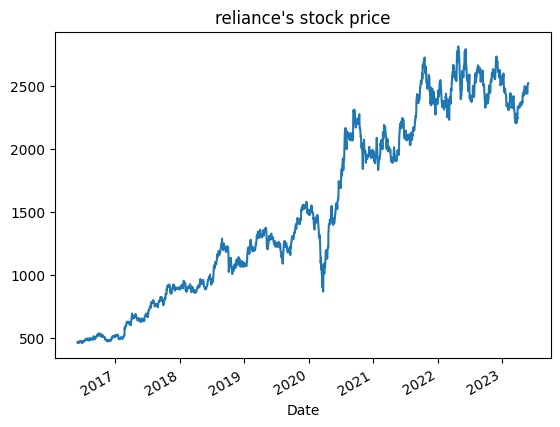

In [5]:
ticker = yf.Ticker("RELIANCE.NS")
stk_data = ticker.history(period="7y")
stk_data['Close'].plot(title="reliance's stock price")

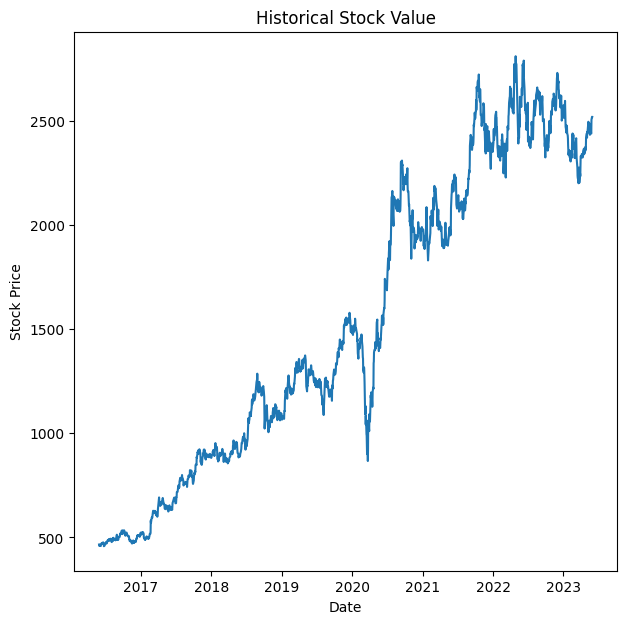

In [6]:
#Visualizing the fetched data
plt.figure(figsize=(7,7))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [7]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [9]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
45/45 [==============================] - 14s 114ms/step - loss: 0.0289
Epoch 2/25
45/45 [==============================] - 5s 115ms/step - loss: 0.0045
Epoch 3/25
45/45 [==============================] - 6s 134ms/step - loss: 0.0043
Epoch 4/25
45/45 [==============================] - 5s 119ms/step - loss: 0.0041
Epoch 5/25
45/45 [==============================] - 7s 147ms/step - loss: 0.0045
Epoch 6/25
45/45 [==============================] - 5s 122ms/step - loss: 0.0036
Epoch 7/25
45/45 [==============================] - 7s 146ms/step - loss: 0.0039
Epoch 8/25
45/45 [==============================] - 5s 122ms/step - loss: 0.0033
Epoch 9/25
45/45 [==============================] - 7s 145ms/step - loss: 0.0043
Epoch 10/25
45/45 [==============================] - 6s 141ms/step - loss: 0.0030
Epoch 11/25
45/45 [==============================] - 6s 140ms/step - loss: 0.0029
Epoch 12/25
45/45 [==============================] - 5s 116ms/step - loss: 0.0036
Epoch 13/25
45/45 [=====

In [11]:
#Fetching the test data and preprocessing
testdataframe = yf.download('RELIANCE.NS',start=dt.datetime(2022,7,1),end=dt.datetime(2023,5,1))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [12]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 2s 30ms/step


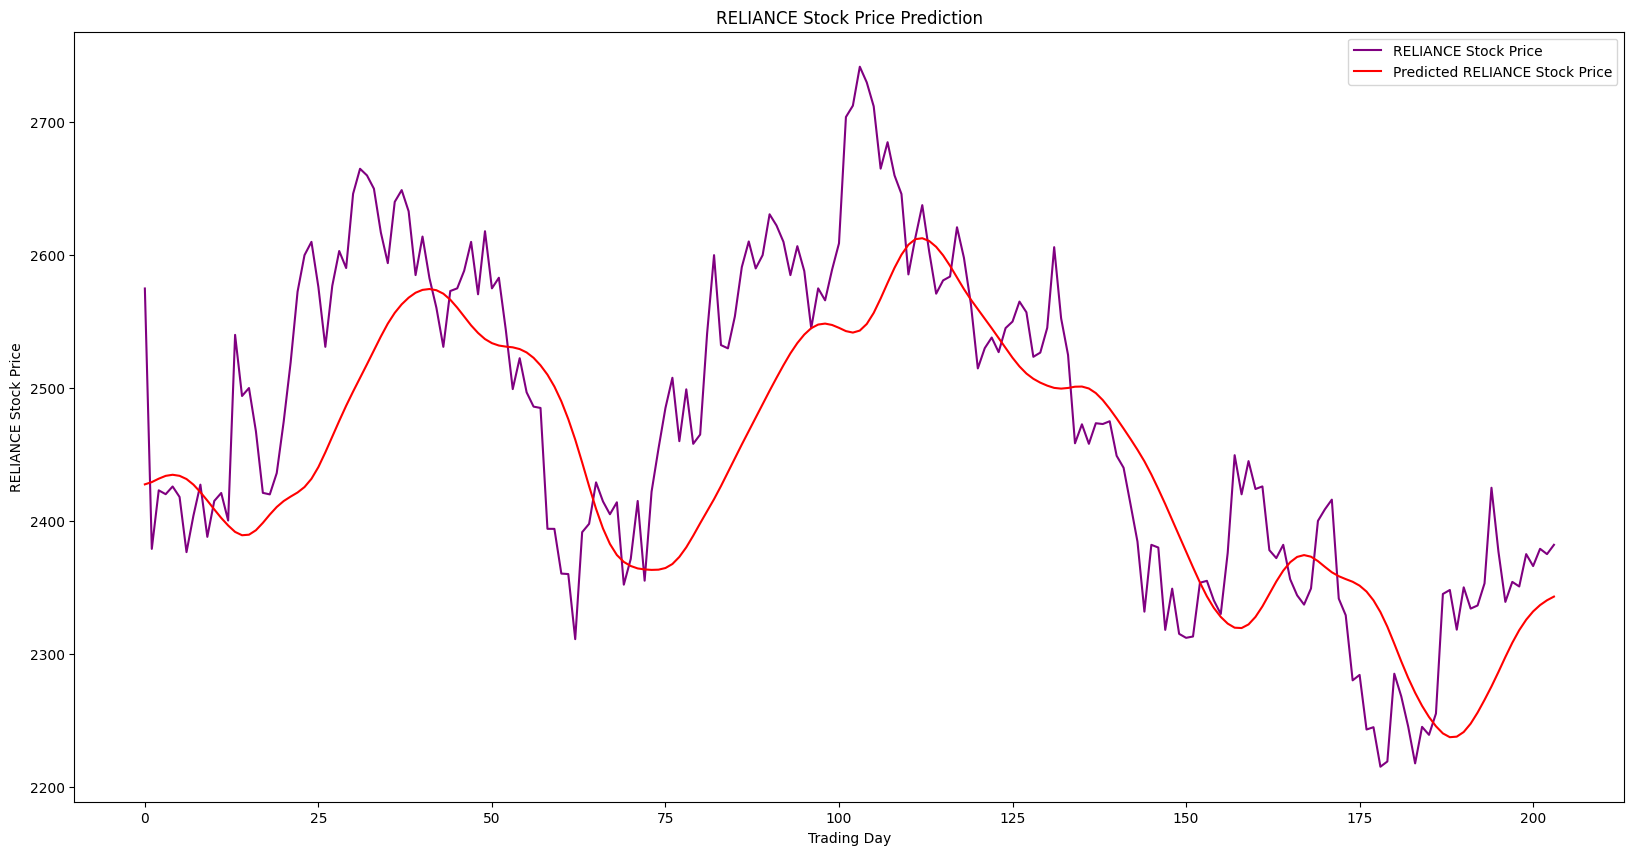

In [13]:
#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'purple', label = 'RELIANCE Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted RELIANCE Stock Price')
plt.title('RELIANCE Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.show()

In [14]:
print(predicted_stock_price)

[[2427.4983]
 [2429.204 ]
 [2431.7703]
 [2433.8975]
 [2434.7175]
 [2433.9202]
 [2431.505 ]
 [2427.292 ]
 [2421.6301]
 [2415.3   ]
 [2408.6528]
 [2402.2285]
 [2396.5408]
 [2391.7139]
 [2389.2043]
 [2389.6074]
 [2392.9644]
 [2398.506 ]
 [2404.773 ]
 [2410.4756]
 [2414.9312]
 [2418.2903]
 [2421.3782]
 [2425.4646]
 [2431.6624]
 [2440.5234]
 [2451.5698]
 [2463.4263]
 [2475.238 ]
 [2486.6606]
 [2497.3438]
 [2507.5989]
 [2517.8787]
 [2528.3398]
 [2538.7727]
 [2548.4749]
 [2556.5757]
 [2562.9893]
 [2567.9805]
 [2571.7148]
 [2573.8577]
 [2574.5068]
 [2573.6023]
 [2571.0017]
 [2566.4714]
 [2560.5034]
 [2553.7935]
 [2547.1501]
 [2541.4448]
 [2536.8442]
 [2533.767 ]
 [2531.9744]
 [2531.1667]
 [2530.6257]
 [2529.306 ]
 [2526.7705]
 [2522.7224]
 [2517.0857]
 [2510.061 ]
 [2501.1086]
 [2489.9998]
 [2476.602 ]
 [2461.2078]
 [2443.9531]
 [2426.0989]
 [2409.0596]
 [2394.3032]
 [2382.6614]
 [2374.3142]
 [2369.1277]
 [2366.0513]
 [2364.229 ]
 [2363.4832]
 [2363.1294]
 [2363.2979]
 [2364.5403]
 [2367.5535]